<a href="https://colab.research.google.com/github/WinnieAnyoso/Supervised_and-_unsupervised_ML_R/blob/master/PART_4_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

data <- read.csv("Supermarket_Sales_Forecasting - Sales.csv")
head(data)

,Date,Sales
,<fct>,<dbl>
1,1/5/2019,548.9715
2,3/8/2019,80.2200
3,3/3/2019,340.5255
4,1/27/2019,489.0480
5,2/8/2019,634.3785
6,3/25/2019,627.6165


In [2]:

dim(data)

[1] 1000    2

In [3]:
# Checking data structure
str(data)

'data.frame':	1000 obs. of  2 variables:
 $ Date : Factor w/ 89 levels "1/1/2019","1/10/2019",..: 27 88 82 20 58 77 49 48 2 44 ...
 $ Sales: num  549 80.2 340.5 489 634.4 ...


In [4]:
# Converting sales from a factor to date type
data$Date <- as.Date(data$Date, "%m/%d/%Y")

In [5]:

# Checking new data structure.
str(data)

'data.frame':	1000 obs. of  2 variables:
 $ Date : Date, format: "2019-01-05" "2019-03-08" ...
 $ Sales: num  549 80.2 340.5 489 634.4 ...


In [6]:

install.packages("ggplot2")

library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



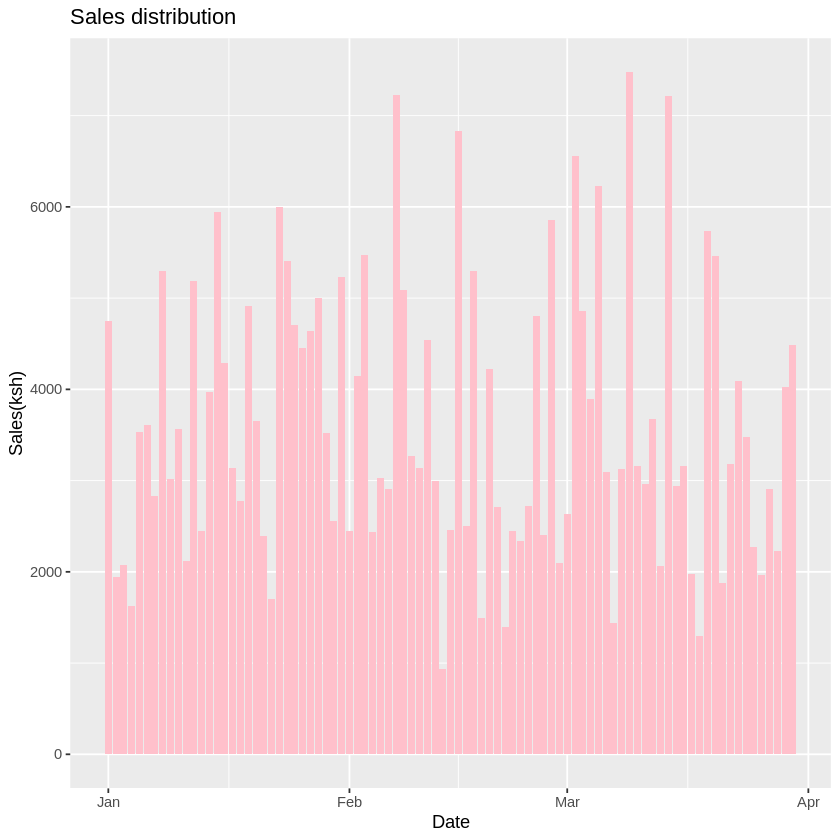

In [7]:
ggplot(data = data, aes(x = Date, y = Sales)) +
      geom_bar(stat = "identity", fill = "pink") +
      labs(title = "Sales distribution",
           x = "Date", y = "Sales(ksh)")

In [8]:
install.packages("tidyverse")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [11]:
install.packages("anomalize")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [12]:
library(tidyverse)
library(anomalize)
library(tibbletime)

In [13]:

#Ordering the data by Date
data = data %>% arrange(Date)
head(data)

,Date,Sales
,<date>,<dbl>
1,2019-01-01,457.443
2,2019-01-01,399.756
3,2019-01-01,470.673
4,2019-01-01,388.290
5,2019-01-01,132.762
6,2019-01-01,132.027


In [14]:
data = aggregate(Sales ~ Date, data, mean)
head(data)

,Date,Sales
,<date>,<dbl>
1,2019-01-01,395.4318
2,2019-01-02,243.1879
3,2019-01-03,259.7661
4,2019-01-04,270.6148
5,2019-01-05,294.7236
6,2019-01-06,401.5783


In [15]:
data = tbl_time(data, Date)
class(data)

[1] "tbl_time"   "tbl_df"     "tbl"        "data.frame"

frequency = 7 days

trend = 30 days

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



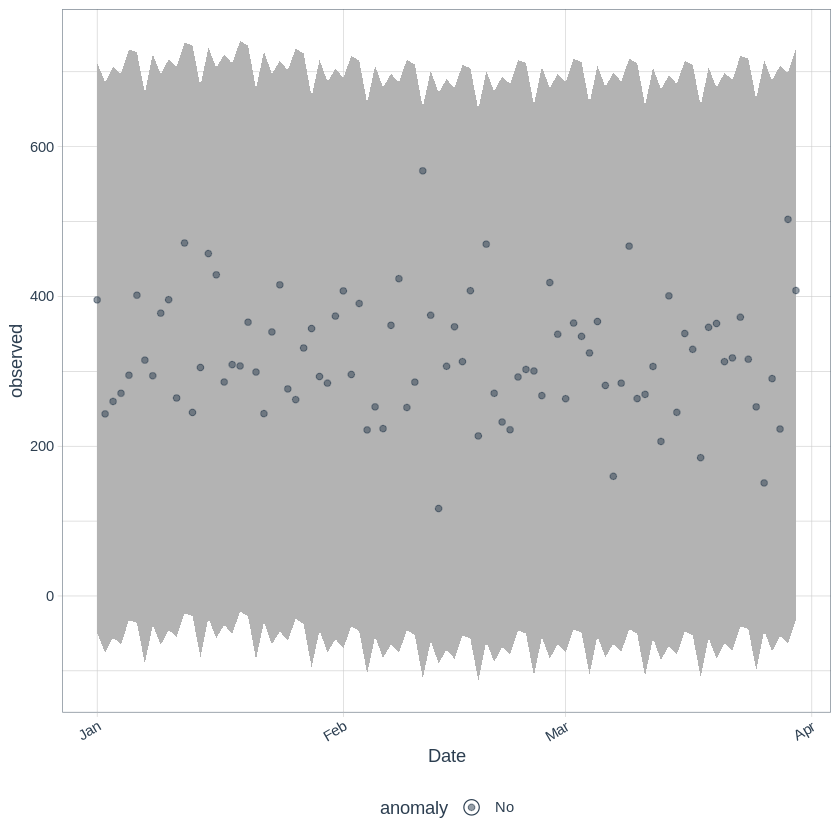

In [16]:
data %>%
    time_decompose(Sales) %>%
    anomalize(remainder) %>%
    time_recompose() %>%
    plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.5)